In [15]:
#Just to make sure that everyone's graphs will show up in the notebook
%matplotlib inline

# Network analysis in python

## The basics
To start with we need to import networkx. Typically we import `networkx` as `nx` since it's shorter to type and we will reference it frequently.

In [16]:
import networkx as nx

The most important part of `networkx` is the `Graph` class. This is the basic class that we will use to represent a network. This class has a number of methods and attributes that help us work with networks.

In [17]:
G = nx.Graph()
print type(G)
print
print dir(G)

<class 'networkx.classes.graph.Graph'>

['__class__', '__contains__', '__delattr__', '__dict__', '__doc__', '__format__', '__getattribute__', '__getitem__', '__hash__', '__init__', '__iter__', '__len__', '__module__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'add_cycle', 'add_edge', 'add_edges_from', 'add_node', 'add_nodes_from', 'add_path', 'add_star', 'add_weighted_edges_from', 'adj', 'adjacency_iter', 'adjacency_list', 'clear', 'copy', 'degree', 'degree_iter', 'edge', 'edges', 'edges_iter', 'get_edge_data', 'graph', 'has_edge', 'has_node', 'is_directed', 'is_multigraph', 'name', 'nbunch_iter', 'neighbors', 'neighbors_iter', 'node', 'nodes', 'nodes_iter', 'nodes_with_selfloops', 'number_of_edges', 'number_of_nodes', 'number_of_selfloops', 'order', 'remove_edge', 'remove_edges_from', 'remove_node', 'remove_nodes_from', 'selfloop_edges', 'size', 'subgraph', 'to_directed', 'to_undirected']


We'll start with a very simple network among a few friends: Alice, Bob, Carol, and David

That means that these individuals will be our nodes

In [18]:
individuals = ['Alice', 'Bob', 'Carol', 'David']
#Add the individuals
G.add_nodes_from(individuals)
#Let's check and make sure that we added them
print "Adding all of the nodes from a list"
print G.nodes()
print

#We can also delete a node
G.remove_node('Bob')
print "Deleting a node"
print G.nodes()
print

#and then add it individually
G.add_node('Bob')
print "Adding Bob back alone"
print G.nodes()

Adding all of the nodes from a list
['Bob', 'David', 'Alice', 'Carol']

Deleting a node
['David', 'Alice', 'Carol']

Adding Bob back alone
['Bob', 'David', 'Alice', 'Carol']


Now let's go and add in the friendships between these people. Now not everyone is friends, for these purposes let's say that the friends are:
* Bob and Alice
* Bob and Carol
* Alice and Carol
* David and Alice

In [19]:
friendships = [('Bob', 'Alice'), ('Bob', 'Carol'), ('Alice', 'Carol'), ('David', 'Alice')]
#Now add the edges
G.add_edges_from(friendships)
#Show that we added the friendships properly
print "All of the edges added from a list"
print G.edges()
print

#Deleting an edge works similarly
G.remove_edge('Bob', 'Carol')
print "Removing Bob and Carol's friendship"
print G.edges()
print

#And then we can add the edge back. Note that when we add an edge individually it is *not* as a tuple
G.add_edge('Bob', 'Carol')
print "Adding the individual edge"
print G.edges()

All of the edges added from a list
[('Bob', 'Carol'), ('Bob', 'Alice'), ('David', 'Alice'), ('Alice', 'Carol')]

Removing Bob and Carol's friendship
[('Bob', 'Alice'), ('David', 'Alice'), ('Alice', 'Carol')]

Adding the individual edge
[('Bob', 'Carol'), ('Bob', 'Alice'), ('David', 'Alice'), ('Alice', 'Carol')]


We can quickly check that everything was added properly by checking the number of nodes and edges and then graphing the network

The number of nodes is: 4
The number of edges is: 4


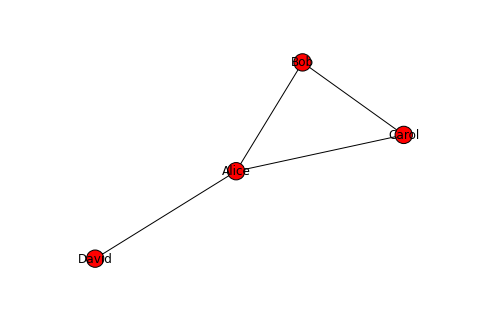

In [20]:
print "The number of nodes is: %d" % G.number_of_nodes()
print "The number of edges is: %d" % G.number_of_edges()

import matplotlib.pyplot as plt
nx.draw_spring(G)

## Setting and accessing Graph Attributes

We can add attributes to each of the nodes if there are features that we want to keep track of. For example, we might want to keep track of the gender.

In [21]:
G.node['Bob']['gender'] = 'Male'
#If we give the option data=True when we print nodes we can see the additional attributes
print "Adding a gender attribute to Bob"
print G.nodes(data=True)
print 
#We see that the attributes are stored as a dictionary for each node

#Now let's add all of the other attributes
genders = [['Alice', 'Female'], ['Carol', 'Female'], ['David', 'Male']]
for name, gender in genders:
    G.node[name]['gender'] = gender
print "Adding genders to all of the nodes"
print G.nodes(data=True)
print

#Accessing nodes individually
print "Looking at the attributes for a single node, here we access Alice's attributes"
print G.node['Alice']

Adding a gender attribute to Bob
[('Bob', {'gender': 'Male'}), ('David', {}), ('Alice', {}), ('Carol', {})]

Adding genders to all of the nodes
[('Bob', {'gender': 'Male'}), ('David', {'gender': 'Male'}), ('Alice', {'gender': 'Female'}), ('Carol', {'gender': 'Female'})]

Looking at the attributes for a single node, here we access Alice's attributes
{'gender': 'Female'}


We can also add attributes to an edge, such as what type of edge it is. 
 

In [22]:
#We set edge attributes by directly referencing the nodes
G['Bob']['Alice']['edge_type'] = 'friendship'
print "Explicitly saying that the edge represents friendship"
print G.edges(data=True)
print

#We can now set all of these attributes
edge_type_attributes = [['Bob', 'Carol'], ['David', 'Alice'], ['Alice', 'Carol']]
for node_i, node_j in edge_type_attributes:
    G[node_i][node_j]['edge_type'] = 'friendship'
print "Setting the edge type for all of the edges in the network"
print G.edges(data=True)
print

#Looking at an individual edge
print "Looking at an individual edge's attributes is effectively the same as setting an attribute"
print G['Bob']['Alice']

Explicitly saying that the edge represents friendship
[('Bob', 'Carol', {}), ('Bob', 'Alice', {'edge_type': 'friendship'}), ('David', 'Alice', {}), ('Alice', 'Carol', {})]

Setting the edge type for all of the edges in the network
[('Bob', 'Carol', {'edge_type': 'friendship'}), ('Bob', 'Alice', {'edge_type': 'friendship'}), ('David', 'Alice', {'edge_type': 'friendship'}), ('Alice', 'Carol', {'edge_type': 'friendship'})]

Looking at an individual edge's attributes is effectively the same as setting an attribute
{'edge_type': 'friendship'}


## Different types of networks

So far what we have constructed is an **undirected unweighted** network. Let's go over what each of these two terms mean individually.

### Undirected vs. Directed

An **undirected** network means that an edge has no direction, in our network an edge means that an edge goes for both of the nodes.

If we wanted to examine a network where we looked at who initiated a conversation with whom during a day, we would want a **directed** network.

<img src="http://www.mathaware.org/mam/04/images/5_directed_network.gif" width="200px"></img>

In a directed network an edge is displayed with an arrow and it shows the direction of the edge and it is not symmetric, **unlike** an undirected network. This means that if:
* Bob starts a conversation with Alice, then we would draw an edge from Bob to Alice with the arrow pointed to Alice
* Later that day Alice started a conversation with Bob, we would draw another edge from Alice to Bob, with the arrow pointed at Bob

### Unweighted vs. Weighted

An **unweighted** network has edges that are effectively binary, either there exists an edge between two nodes or there does not exist an edge. All edges that exist are counted the same.  This type of network makes sense for friendship, since two people are either friends or they are not. 

If we think about our conversation network though, we would want to know the **number** of times that two individuals interact --- especially because it is likely that all of the individuals would talk to each other during the course of a day. This means that the presence or absence of an edge doesn't matter because it is a **fully connected** network. We would add the **number** of conversations, more typically known as the **weight** of an edge, to represent the strength of the connection between two nodes. In a graph we typically show weights by making the width of an edge larger.
<img src="https://humannaturegroup.files.wordpress.com/2009/12/map.png" width="400px"></img>


## Making a weighted network

We can easily make a conversation network between our individuals

In [23]:
import itertools, random

#We will add all combinations of nodes using itertools.combinations
#To add an attribute when we add an edge, we put it in as a dictionary
H = nx.Graph()
for name_i, name_j in itertools.combinations(individuals, 2):
    H.add_edge(name_i, name_j, {'weight': random.randint(1,20)})
    
print H.edges(data=True)

[('Bob', 'Carol', {'weight': 17}), ('Bob', 'Alice', {'weight': 19}), ('Bob', 'David', {'weight': 2}), ('David', 'Alice', {'weight': 8}), ('David', 'Carol', {'weight': 14}), ('Alice', 'Carol', {'weight': 4})]


# Looking at network attributes

Frequently we will be interested in the **degree** of a node, the degree is the number of neighbors that a node has.

In [24]:
#We can look at the degree of a node easily
print "The number of neighbors for Bob"
print H.degree('Bob')
print

#Can demonstrate the difference between friends and conversations too
print "Degree for Bob in the friendship network: %d" % G.degree('Bob')
print "Degree for Bob in the conversation network: %d" % H.degree('Bob')

The number of neighbors for Bob
3

Degree for Bob in the friendship network: 2
Degree for Bob in the conversation network: 3


# Now let's download a bigger network 

We will use the data for trips between Divvy stations

In [25]:
!wget http://tinyurl.com/bootcamp-divvy-attributes && mv bootcamp-divvy-attributes ../../Data/divvy_network.json
!ls ../../Data/

#If the wget command does not work just navigate your web browser to the link and download the content (either through
#copying and pasting or some other method) and place that file in the Data Directory, naming it:
# divvy_network.json

--2014-09-10 10:03:01--  http://tinyurl.com/bootcamp-divvy-attributes
Resolving tinyurl.com... 23.61.56.155
Connecting to tinyurl.com|23.61.56.155|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.github.com/adamrpah/93718d7e0ba307e82ead/raw [following]
--2014-09-10 10:03:01--  https://gist.github.com/adamrpah/93718d7e0ba307e82ead/raw
Resolving gist.github.com... 192.30.252.142
Connecting to gist.github.com|192.30.252.142|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/adamrpah/93718d7e0ba307e82ead/raw [following]
--2014-09-10 10:03:02--  https://gist.githubusercontent.com/adamrpah/93718d7e0ba307e82ead/raw
Resolving gist.githubusercontent.com... 192.30.252.159
Connecting to gist.githubusercontent.com|192.30.252.159|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: 'bootcamp-divvy-attributes'

    [

## Loading network files
There are many different ways to store a network in a file. Traditionally an edgelist is used, this is a simple file where the edges are listed on individual lines and the node labels are typically integers, like so:

`
0 1
0 2
2 1
`

This is fine, but it can get hairy to add lots of attributes to this format (typically only weight would be included and it is just added as a third column). For these types of files we typically use a JSON formant.

A JSON is just a type of file that is very popular on the web, the contents of a JSON are just a dictionary. Since it is just a dictionary, it is easy to store node and edge attributes

We can load it with a special function in `networkx`.

In [26]:
from networkx.readwrite import json_graph

json_string = open('../../Data/divvy_network.json').read()
G = json_graph.loads(json_string)

print G.number_of_nodes()
print G.node[G.nodes()[0]]

299
{'latitude': 41.88389277, 'capacity': 43, 'name': u'Michigan Ave & Washington St', 'longitude': -87.62464914}


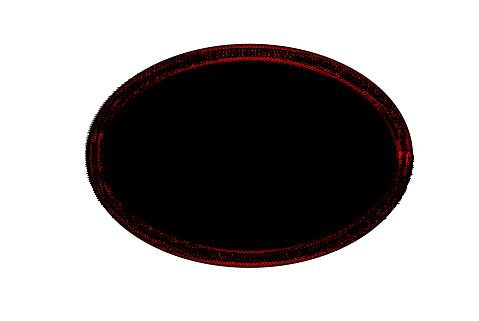

In [27]:
#We can try to understand this network now
nx.draw_circular(G)

Pretty!

Understanding non-trivial networks is difficult by plotting the network because of the large number of nodes and edges that would overlap. For this reason we typically look at distributions of network statistics, such as the distribution of degrees.

25 263


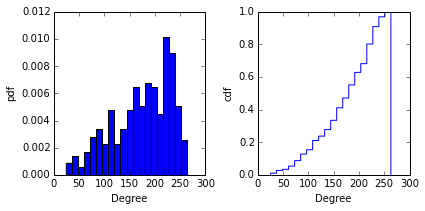

In [28]:
#Plotting the distribution of degrees
degrees = [G.degree(n) for n in G.nodes()]
degrees.sort()
print min(degrees), max(degrees)

fig = plt.figure(figsize=(6,3))

ax = plt.subplot(121)
ax.hist(degrees, bins=20, normed=True)
ax.set_xlabel('Degree')
ax.set_ylabel('pdf')

ax = plt.subplot(122)
ax.hist(degrees, bins=20, normed=True, cumulative=True, histtype='step')
ax.set_xlabel('Degree')
ax.set_ylabel('cdf')

plt.tight_layout()

So what we can see is that there is a slight peak near the larger side of the distribution, this means that there are a number of Divvy stations that see a large number of trips. 

First let's make a function to plot the pdf and cdf simultaneously

In [29]:
def plot_distributions(dataset, xlabel):
    '''
    Plots the PDF and CDF for a dataset
    input:
        * dataset -- data to be graphed as a list []
        * xlabel -- string to label the x-axis with
    output:
        * None
    '''
    fig = plt.figure(figsize=(8,4))

    ax = plt.subplot(121)
    ax.hist(dataset, bins=20, normed=True)
    ax.autoscale()
    ax.set_xlabel(xlabel)
    ax.set_ylabel('pdf')

    ax = plt.subplot(122)
    ax.hist(dataset, bins=20, normed=True, cumulative=True, histtype='step')
    ax.autoscale()
    ax.set_xlabel(xlabel)
    ax.set_ylabel('cdf')

    plt.tight_layout()

Since the Divvy Trip network is a transportation network (it shows movement from one station to another) we can look at betweenness centrality. Betweenness centrality for a node `i` is the sum of the fraction of shortest paths that pass through `i`.

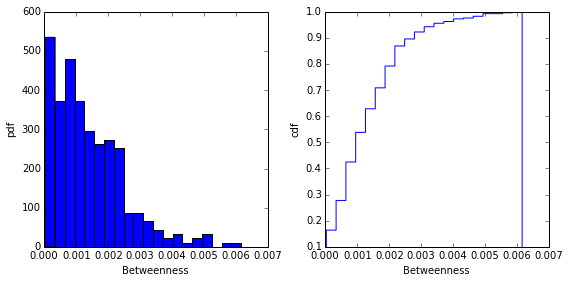

In [30]:
betweenness_dict = nx.betweenness_centrality(G)
plot_distributions(betweenness_dict.values(), 'Betweenness')

Now we should look and see if this network is assortative. That means, what is my degree versus my neighbor's degree? Am I typically connected to neighbors that have the same degree as me or not?

In [31]:
avg_neigh_degrees = nx.average_neighbor_degree(G)

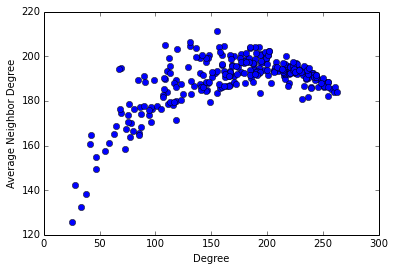

In [32]:
xdata, ydata = [], []
for n, avg_neigh_degree in avg_neigh_degrees.items():
    xdata.append(G.degree(n))
    ydata.append(avg_neigh_degree)

plt.plot(xdata, ydata, 'bo')
plt.xlabel('Degree')
plt.ylabel('Average Neighbor Degree')

Here we see that the network is assortative, nodes with a high-degree have neighbors that also have a high degree. This makes sense since this network exists in a real geography (Divvy Bike Stations exist at certain locations, users aren't likely to skip lots of stations where they could potentially dock them (and then not be charged for additional time).

We can and should check this though.

In [33]:
import math

def calculate_distance(pt1, pt2):
    '''
    Calculates the Haversine distance formula
    input:
        pt1: tuple of lat,long for point 1
        pt2: tuple of lat,long for point 2
    output:
        dist: Distance in km between the two points
    '''
    radius_earth = 6373
    degrees_to_radians = math.pi/180.0
    phi1 = (90.0 - pt1[0])*degrees_to_radians
    phi2 = (90.0 - pt2[0])*degrees_to_radians
    theta1 = pt1[1]*degrees_to_radians
    theta2 = pt1[1]*degrees_to_radians
    #The meat of the formula
    cos_num = (math.sin(phi1)*math.sin(phi2)*math.cos(theta1 - theta2) + \
               math.cos(phi1)*math.cos(phi2))
    arc = math.acos( cos_num )
    dist = radius_earth * arc
    return dist

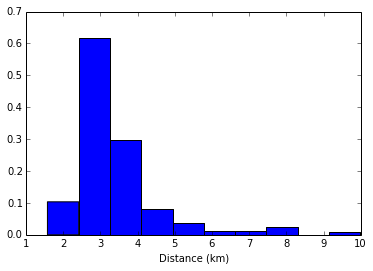

In [34]:
#Now let's calculate the neighbor distances
import numpy as np

avg_neighbor_distances = []
for inode in G.nodes_iter():
    inode_distances = []
    for jnode in G.neighbors(inode):
        pt1 = (G.node[inode]['latitude'], G.node[inode]['longitude'])
        pt2 = (G.node[jnode]['latitude'], G.node[jnode]['longitude'])
        if pt1 != pt2:
            inode_distances.append(calculate_distance(pt1, pt2))
        else:
            inode_distances.append(0)
    avg_neighbor_distances.append(np.mean(inode_distances))
    
plt.hist(avg_neighbor_distances, normed=True)
plt.xlabel('Distance (km)')

Interesting, this appears to be a pretty small distance. But to make sure we should calculate and plot the differences between distance between neighbors and distance between non-neighbors

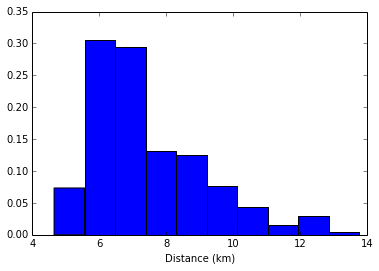

In [35]:
import numpy as np

avg_non_neighbor_distances = []
for inode in G.nodes_iter():
    inode_distances = []
    jnodes = [n for n in G.nodes() if n not in G.neighbors(inode)]
    for jnode in jnodes:
        pt1 = (G.node[inode]['latitude'], G.node[inode]['longitude'])
        pt2 = (G.node[jnode]['latitude'], G.node[jnode]['longitude'])
        if pt1 != pt2:
            inode_distances.append(calculate_distance(pt1, pt2))
        else:
            inode_distances.append(0)
    avg_non_neighbor_distances.append(np.mean(inode_distances))
    
plt.hist(avg_non_neighbor_distances, normed=True)
plt.xlabel('Distance (km)')

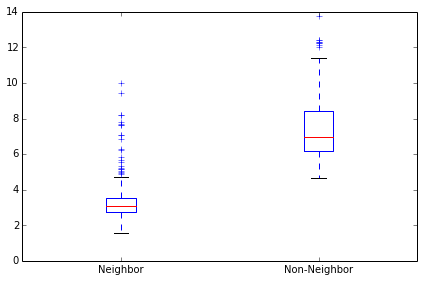

In [53]:
ax = plt.subplot(111)
ax.boxplot([avg_neighbor_distances, avg_non_neighbor_distances])
plt.setp(ax, xticklabels=['Neighbor', 'Non-Neighbor'])
ax.set_xlim(0.5,2.5)
plt.tight_layout()

Now let's test whether these two distributions from the same distribution or not, using the Kolmogorov-Smirnov test.

**Are these two distributions the same or not?**

In [54]:
from scipy.stats import ks_2samp

D, p = ks_2samp(avg_neighbor_distances, avg_non_neighbor_distances)
print p

2.03803289175e-113


#Statistical tests and edge randomizations

This was a pretty simple problem, but we're not always interested that in a quantity that can be tested by non-neighbor nodes. In those situations we will typically create an ensemble of randomized networks and in each randomized network calculating our quantity of interest. We then see if our known quantity is the a part of the same distribution from the randomized set. Let's test that way now.

Since there is a small number of edges in the network, let's do randomize 5 times the number of edges in the network and make 100 versions of these networks.

In [60]:
def calc_neigh_distances(G): 
    avg_neighbor_distances = []
    for inode in G.nodes_iter():
        inode_distances = []
        for jnode in G.neighbors(inode):
            pt1 = (G.node[inode]['latitude'], G.node[inode]['longitude'])
            pt2 = (G.node[jnode]['latitude'], G.node[jnode]['longitude'])
            if pt1 != pt2:
                inode_distances.append(calculate_distance(pt1, pt2))
            else:
                inode_distances.append(0)
        avg_neighbor_distances.append(np.mean(inode_distances))
    return avg_neighbor_distances

randomized_avg_neigh_distances = []

for i in range(100):
    if i % 10 ==0:
        print i
    #We'll just do a copy
    H = G.copy()
    nx.double_edge_swap(H, nswap = int(0.5 * H.number_of_edges()), max_tries= 100 * H.number_of_edges())
    #now we need to calculate the avg_neighbor distance....gosh...sure wish we made a function....
    randomized_avg_neigh_distances.append(np.average(calc_neigh_distances(H)))

0
10
20
30
40
50
60
70
80
90


The z-score for this randomization is: $f
So...yes...pretty significant


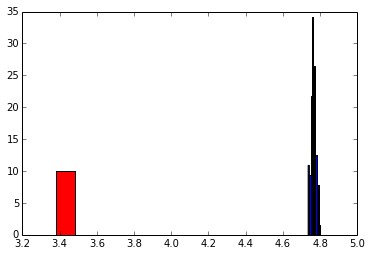

In [70]:
plt.hist(randomized_avg_neigh_distances, normed=True)
plt.hist([np.average(avg_neighbor_distances)], normed=True, color='red')

#Calculate the significance:
z_score = (np.average(avg_neighbor_distances) - np.average(randomized_avg_neigh_distances))/np.std(randomized_avg_neigh_distances)
print "The z-score for this randomization is: $f" % z_score
print "So...yes...pretty significant"

# Network Path Traversal

Another important part is traversing a network. What are two easy ways that this could be done?

**answer is....**

Breadth-first or depth-first

Perfect!

Now let's implement breadth first of these algorithms

so if we have a tree like:

`
 -> My tree starting from Z
     Z
  |     |
  B     C
|  |  |  |
D  E  F  G
`

The answer should be:
[B, C, D, E, F, G]

In [71]:
#Implement a search algorithm
def bfs(G, source, queue = [], breadth_nodes = [], visited_nodes = []):
    visited_nodes.append(source)
    #Set a breadth_queue
    level_queue = [n for n in G.neighbors(source) if n not in visited_nodes]
    breadth_nodes += level_queue
    while level_queue:
        new_source = level_queue[0]
        #Get that into visited nodes
        visited_nodes.append(new_source)
        new_level_queue = [n for n in G.neighbors(new_source) if n not in visited_nodes and n not in breadth_nodes]
        breadth_nodes += new_level_queue
        level_queue += new_level_queue
        del level_queue[0]
    return breadth_nodes

print bfs(G, G.nodes()[0])


[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 19, 20, 21, 22, 23, 25, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 80, 82, 83, 84, 85, 87, 90, 93, 96, 98, 102, 106, 108, 112, 117, 123, 124, 126, 128, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 141, 142, 143, 146, 147, 148, 149, 150, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 168, 169, 170, 171, 172, 173, 174, 179, 181, 182, 184, 185, 186, 189, 190, 191, 192, 193, 194, 196, 197, 200, 206, 209, 211, 212, 213, 214, 215, 217, 220, 221, 223, 224, 226, 228, 229, 232, 233, 234, 235, 237, 241, 243, 244, 245, 246, 247, 248, 249, 255, 257, 262, 263, 264, 265, 266, 269, 272, 273, 275, 276, 277, 282, 284, 289, 290, 294, 295, 296, 298, 300, 301, 302, 303, 308, 309, 310, 316, 323, 324, 326, 327, 328, 329, 331, 332, 337, 338, 339, 340, 341, 344, 346, 347, 349, 350, 353, 361, 

But there's a simpler way to do this, since it's a built in method of networkx

In [80]:
dfs_edges = nx.traversal.dfs_edges(G, G.nodes()[0])
print dfs_edges
print dir(dfs_edges)

<generator object dfs_edges at 0x109f75f50>
['__class__', '__delattr__', '__doc__', '__format__', '__getattribute__', '__hash__', '__init__', '__iter__', '__name__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'close', 'gi_code', 'gi_frame', 'gi_running', 'next', 'send', 'throw']


In [83]:
party = True
while party:
    try:
        print dfs_edges.next()
    except:
        party=False

(3, 4)
(4, 5)
(5, 6)
(6, 7)
(7, 8)
(8, 9)
(9, 10)
(10, 11)
(11, 12)
(12, 13)
(13, 14)
(14, 16)
(16, 17)
(17, 19)
(19, 20)
(20, 21)
(21, 22)
(22, 23)
(23, 25)
(25, 27)
(27, 28)
(28, 29)
(29, 30)
(30, 31)
(31, 32)
(32, 33)
(33, 26)
(26, 384)
(384, 128)
(128, 34)
(34, 36)
(36, 37)
(37, 38)
(38, 39)
(39, 40)
(40, 42)
(42, 43)
(43, 44)
(44, 45)
(45, 46)
(46, 48)
(48, 49)
(49, 50)
(50, 51)
(51, 52)
(52, 53)
(53, 54)
(54, 56)
(56, 57)
(57, 58)
(58, 59)
(59, 60)
(60, 61)
(61, 62)
(62, 63)
(63, 64)
(64, 65)
(65, 66)
(66, 67)
(67, 68)
(68, 69)
(69, 70)
(70, 71)
(71, 72)
(72, 73)
(73, 76)
(76, 75)
(75, 77)
(77, 74)
(74, 78)
(78, 80)
(80, 84)
(84, 85)
(85, 88)
(88, 82)
(82, 83)
(83, 396)
(396, 86)
(86, 137)
(137, 87)
(87, 92)
(92, 93)
(93, 104)
(104, 108)
(108, 89)
(89, 91)
(91, 96)
(96, 106)
(106, 90)
(90, 214)
(214, 388)
(388, 98)
(98, 97)
(97, 149)
(149, 150)
(150, 99)
(99, 102)
(102, 117)
(117, 138)
(138, 119)
(119, 262)
(262, 123)
(123, 109)
(109, 112)
(112, 124)
(124, 126)
(126, 127)
(127, 1